In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pandas.api.types import CategoricalDtype

In [23]:
bike = pd.read_csv(r"C:\Users\DANIEL\Documents\DataScience\data\BIKE_EX.csv")
bike.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,work day by moth,weathersit_by_moth,weathersit_by_moth.1,weathersit_by_moth.2,date
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0.65,0,1,0,1
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0.65,0,1,0,2
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0.65,1,0,0,3
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0.65,1,0,0,4
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0.65,1,0,0,5


In [8]:
bike.shape

(365, 17)

In [17]:
bike.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,work day by moth,date
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.643665,0.191403,3405.761644,0.686658,15.720548
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.148744,0.076890,1378.753666,0.032468,8.808321
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,431.000000,0.650000,1.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.538333,0.135583,2132.000000,0.650000,8.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.647500,0.186900,3740.000000,0.680000,16.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.742083,0.235075,4586.000000,0.730000,23.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.972500,0.507463,6043.000000,0.740000,31.000000


In [24]:
bike.drop("atemp", axis=1, inplace=True)
bike.drop("weathersit_by_moth", axis=1, inplace=True)
bike.drop("weathersit_by_moth.1", axis=1, inplace=True)
bike.drop("weathersit_by_moth.2", axis=1, inplace=True)
bike.drop("date", axis=1, inplace=True)
bike.drop("date", axis=1, inplace=True)

In [96]:
bike.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,work_day_by_moth
0,1,1,1,0,6,0,2,0.344167,0.805833,0.160446,985,0.65
1,2,1,1,0,0,0,2,0.363478,0.696087,0.248539,801,0.65
2,3,1,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0.65
3,4,1,1,0,2,1,1,0.200000,0.590435,0.160296,1562,0.65
4,5,1,1,0,3,1,1,0.226957,0.436957,0.186900,1600,0.65


In [61]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
id                  365 non-null int64
season              365 non-null int64
mnth                365 non-null int64
holiday             365 non-null int64
weekday             365 non-null int64
workingday          365 non-null int64
weathersit          365 non-null int64
temp                365 non-null float64
hum                 365 non-null float64
windspeed           365 non-null float64
cnt                 365 non-null int64
work_day_by_moth    365 non-null float64
dtypes: float64(4), int64(8)
memory usage: 34.3 KB


In [62]:
duplicate_rows=bike.duplicated(['id','temp','hum','windspeed','cnt'])
bike[duplicate_rows]

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,work_day_by_moth


In [32]:
from pandas_profiling import ProfileReport
prof = ProfileReport(bike)
prof.to_file(output_file='output.html')
prof.to_notebook_iframe()

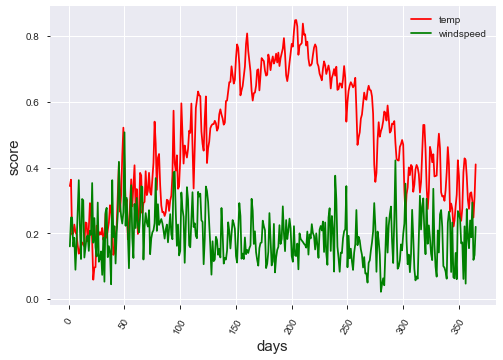

In [63]:
plt.plot('id', 'temp', data=bike.groupby(['id']).sum().reset_index(drop=None), color='red')
plt.plot('id', 'windspeed', data=bike.groupby(['id']).sum().reset_index(drop=None), color='green')
plt.xticks(rotation=60)
plt.ylabel('score',fontsize=15)
plt.xlabel('days',fontsize=15)
plt.legend()
plt.show()

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
nv =['id','season','mnth','holiday','weekday','workingday','weathersit','temp','hum']
yv =['cnt']

In [99]:
X = bike.loc[:,nv]
y = bike.cnt

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=4)

In [ ]:
conda install xgboost

In [111]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [109]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [118]:
import xgboost
from sklearn.metrics import explained_variance_score

In [115]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [116]:
xgb.fit(X_train,y_train)

[13:00:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [119]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.8005160080713876


In [120]:
features = bike.iloc[:,3:].columns.tolist()
target = bike.iloc[:,2].name

In [121]:
correlations = {}
for f in features:
    data_temp = bike[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

NameError: name 'pearsonr' is not defined